# Keras Tools for Convolutional Neural Network (CNN)

#### Dr. Mohamed Marzouk Sobaih, Postdoctoral Researcher
#### [Twitter](https://twitter.com/mohamedmarzouk2) | [GitHub](https://github.com/momarzouksobeh) | [GoogleScholar](https://scholar.google.com/citations?hl=en&user=OWIaK9sAAAAJ) | [Website](https://momarzouksobeh.github.io) | [LinkedIn](http://www.linkedin.com/in/momarzouksobeh/)

# Table of Content 
- [1 - Introduction ](#intro)
    - [1.1 What is CNN ? and Why it is important? ](#CNN)
    - [1.2 What will we cover in this tutorial? ](#tutorial_imp)
    - [1.3 Load the required libraries ](#import)
    - [1.4 What is the version of Keras used in this tutorial? ](#tf_version)
- [2 - Data preparation ](#preparation)
    - [2.1 Load data ](#load_data)
    - [2.2 Split data for training and test set ](#split)
    - [2.3 Data Normalization](#normalization)
- [3- Build CNN model ](#CNN_model)
    - [3.1 What is the main difference between DNN & CNN? ](#DNN_CNN_difference)
    - [3.2 What are the various types of layers that can be incorporated into a CNN? ](#CNN_layers)
    - [3.3 How can we add a Convolutional Layer into our CNN model using **TensorFlow** (**Keras**)?](#add_Convolutional_layers)
    - [3.4 How can we add a Pooling Layer into our CNN model using **TensorFlow** (**Keras**)?](#add_pooling_layers)
    - [3.5 How can we add a Batch Normalization layer  into our CNN model using **TensorFlow** (**Keras**)?](#add_normalization_layer)
    - [3.6 The summary for defining our CNN model in Keras ](#buildmodel_summary)
    - [3.7 Define our CNN model by Keras ](#define_model)
    - [3.8 Information about the defined model ](#model_info)
    - [3.9 Compile our Model ](#model_compile)
- [4- Train & Evaluate the model](#train_evaluate)
    - [4.1 Train (Fit) our CNN Model ](#train_model)
    - [4.2 The history of model learning on training data ](#model_history)
    - [4.3 Evaluate our CNN Model ](#evaluate_model)
- [5- Prediction ](#prediction)
    - [5.1 Make Predictions using our trained model ](#make_prediction)
    - [5.2 Visualize correct and incorrect predictions ](#correct_incorrect)
-  [6- Model Saving ](#saving)
    - [6.1 Save the entire model ](#model_saving)
    - [6.2 Save the layers weights ](#weights_saving)
    - [6.3 Reload the weights again in a new model ](#reload_weights)
-  [ Further TensorFlow (Keras) Applications for CNN ](#other_apps)
-  [ Key Resources Utilized in Crafting This Notebook](#resources)


<a name="intro"></a>
## 1 - Introduction

<a name="CNN"></a>
### 1.1 What is CNN ? and Why it is important? 
**Convolutional Neural Network (CNN)** : are a type of artificial neural network that has been particularly successful in the fields of computer vision, image recognition, and other visual tasks.
* It is important, Because it has been used to achieve state-of-the-art results in a wide range of image recognition tasks, including:
    * Image classification
    * Object detection
    * Image segmentation
    * Medical image analysis

<a name="tutorial_imp"></a>
### 1.2 What will we cover in this tutorial?
We will build a CNN model for the **MNIST** handwritten digit recognition dataset, which is readily available in Keras. This tutorial will provide hands-on practice to cover the key components of CNNs.
* Key Points to Remember:
    * The **MNIST dataset** encompasses grayscale images of handwritten digits (0 through 9) each image is 28x28 pixels. 
    * We have previously constructed a deep neural network (DNN) model for the **MNIST** dataset. The model achieved an accuracy of 90% without normalization and 97% with normalization of the data.
    * To look at the details of the previous tutorial follow this [link](). #TODO add the link

<a name="import"></a>
### 1.3 Load the required libraries

<!-- We will need some standard packages. These should have been installed with Anaconda 3.
* [numpy](https://numpy.org/): To generate arrays <br>
* [matplotlib](https://matplotlib.org/): Vilsualization purpose <br>
* sklearn: for model metrics, confusion matrices, one hot encoder

We also will need tensor flow, this will require an install as it is not available in Anaconda
* [tensorflow > 2.0.0](https://www.tensorflow.org/learn): Design, compile and train neural network models -->

In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
from matplotlib import cm
from matplotlib.patches import FancyArrowPatch
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.colors as colors
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

<a name="tf_version"></a>
### 1.4 What is the version of Keras used in this tutorial ?
- **Keras** can be accessed either as a dependent module within **TensorFlow** or independently as a standalone framework. 
> For this notebook, we are utilizing **TensorFlow** and **Keras**, with versions '2.14.0', and '2.12.0' respectively. 

In [2]:
print("The version of tensorflow is : ", tf.__version__)
print("The version of keras is : ", keras.__version__)

The version of tensorflow is :  2.14.0
The version of keras is :  2.12.0


<a name="preparation"></a>
## 2 - Data preparation 

<a name="load_data"></a>
### 2.1 Load Data
> You can use one of other ways to load the dataset from keras or tf.keras 

In [3]:
mnist = tf.keras.datasets.mnist
# Or
# mnist = keras.datasets.mnist

<a name="split"></a>
### 2.2 Split data for training and test set

In [4]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print('X Train Shape is : ' , x_train.shape)
# print('X Train  is : ' , x_train[1])
print('---------------------------------------- ')
print('X Test Shape is : ' , x_test.shape)
# print('X Test  is : ' , x_test[1])
print('---------------------------------------- ')
print('y Train Shape is : ' , y_train.shape)
# print('y Train is : ' , y_train[5])
print('---------------------------------------- ')
print('y Test Shape is : ' , y_test.shape)
# print('y Test  is : ' , y_test[5])

X Train Shape is :  (60000, 28, 28)
---------------------------------------- 
X Test Shape is :  (10000, 28, 28)
---------------------------------------- 
y Train Shape is :  (60000,)
---------------------------------------- 
y Test Shape is :  (10000,)


<a name="normalization"></a>
### 2.3 Data Normalization
* We can do Scaling or Normalization by many methods as example here just divide over 255 as this is the maximum value. 
* We can normalize the data also by normalization function *tf.keras.utils.normalize*, we will take about it later 

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

> Look at one of the images 

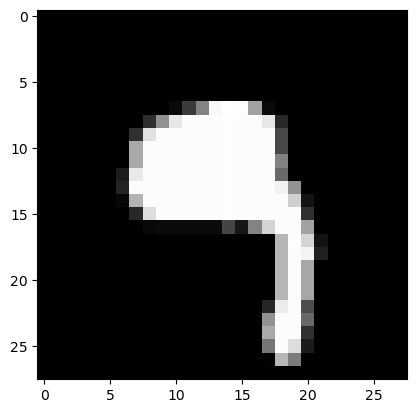

In [6]:
image_no =209
plt.imshow(x_test[image_no], cmap='gray');

<a name="CNN_model"></a>
## 3- Build CNN model 

<a name="DNN_CNN_difference"></a>
### 3.1 What is the main difference between DNN & CNN? 

* The main difference between DNNs and CNNs lies in their architecture and the types of layers they use as you can see in this diagram.

   * DNNs commonly employ fully connected layers, wherein every neuron in a given layer is connected to each neuron in the subsequent layer. However, this connectivity pattern can lead to significant computational demands during both the training and utilization phases of DNNs.

    * CNNs utilize multiple convolution layers and pooling layers, specifically designed to extract features from localized regions within the input data. This design enhances the efficiency of CNNs, rendering them less computationally intensive during both training and utilization compared to DNNs.

 <div style="text-align:center">
    <img src="images/CNN_DNN.jpg" alt="DNN&CNN" />
    <p style="font-style: normal; margin-top:10px;">DNN and CNN architecture</p>
</div>

- Simply you think in CNN like this diagram
 <div style="text-align:center">
    <img src="images/CNN_arch.png" alt="CNN_arch" />
    <p style="font-style: normal; margin-top:10px;">The CNN architecture</p>
</div>

<a name="CNN_layers"></a>
### 3.2 What are the various types of layers that can be incorporated into a CNN?


* [**Convolutional Layer**]() :  (Extract features from the input image)
    * The convolutional layer is the basic building block of a CNN. 
    * It is responsible for extracting features from the input image. 
    * The convolutional layer takes an input image and a kernel (also known as a filter) as input. 
    * The filter is a small square matrix of weights that is slid across the input image. 
    * By sliding the filter over the input image, the dot product is taken between the filter and the parts of the input image with respect to the size of the filter.
    * The output is termed as the Feature map which gives us information about the image such as the corners and edges.
    
    * Later, this feature map is fed to other layers to learn several other features of the input image.

    
* [**Pooling Layer**]() : (Reduce the dimensionality of the feature maps)
    * In most cases, a Convolutional Layer is followed by a Pooling Layer.
    * The primary aim of this layer is to decrease the size of the convolved feature map to reduce the computational costs.
    * It works by taking the maximum (Max Pooling) or average (Average Pooling) value of a subregion of the input feature map and using that value as the output of the pooling operation. 
    * Depending upon method used, there are several types of Pooling operations.
    * It basically summaries the features generated by a convolution layer.
    * The pooling layer can also have a stride, which is the number of pixels that the pooling window is moved by each time it is applied to the input feature map.
    
    * The Pooling Layer usually serves as a bridge between the Convolutional Layer and the FC Layer.


* [**Batch Normalization Layer** ](): (Normalize the activations of the layers in the CNN)
    * The batch normalization layer is used to normalize the activations of the layers in the CNN. This helps to improve the training and generalization performance of the network. 
    
    * The batch normalization layer works by normalizing the mean and variance of the activations of each layer in the network. 


* [**Fully Connected Layer** ](): (Classify the input image)
    * These layers are usually placed before the output layer and form the last few layers of a CNN Architecture.
    * The fully connected (FC)layer is used to classify the input image. 
    * In this, the input image from the last pooling layer are flattened and fed to the FC layer. The flattened vector then undergoes few more FC layers where the mathematical functions operations usually take place. In this stage, the classification process begins to take place.
    * The fully connected layer also has an activation function, such as softmax, that is applied to the output of the layer. 
    
    * The softmax activation function converts the output of the fully connected layer into a probability distribution, where the probability of each class is equal to the output of the corresponding neuron in the fully connected layer.


* [**Dropout Layer**]() : (Prevent overfitting)
    * Usually, when all the features are connected to the FC layer, it can cause overfitting in the training dataset. 
    * Overfitting occurs when a particular model works so well on the training data causing a negative impact in the model’s performance when used on a new data.
    * To overcome this problem, a dropout layer is utilized wherein a few neurons are dropped randomly from the neural network during training process resulting in reduced size of the model.
    * On passing a dropout of 0.3, 30% of the nodes are dropped out randomly from the neural network.
    
    * This helps to prevent the network from learning too much from the training data and can improve the generalization performance of the network.
  

<a name="add_Convolutional_layers"></a>
### 3.3 How can we add a Convolutional Layer into our CNN model using **TensorFlow** (**Keras**)?

Note : I just added some values as examples, but in practical applications we can decide based on the case under study. 

> The function used : **Conv2D()** 
* **The important arguments** : 
  * **filters**=`32` : This is the number of filters (kernels) to use in the convolutional layer. A filter is a small window that is slid across the input image to extract features.
  * kernel_size=(3,3) : This is the size of the kernel. In this example, the kernel is 3 pixels wide and 3 pixels tall.
  * **strides**=`(1,1)`: The stride is the number of pixels that the kernel is moved by each time it is applied to the input image. In this example, the kernel is moved by 1 pixel in each direction(horizontally and vertically).
  * **padding**=`'same'`: The padding mode determines how the input image is padded before the convolution operation is performed. In this example, the input image is padded with zeros so that the output image has the same dimensions as the input image. The other option is 
  * **activation**=`'relu'`: The activation function is a non-linear function that is applied to the output of the convolution operation. 
  * **input_shape**=`(28,28,1)`: The input shape is a tuple that specifies the height, width, and channel depth of the input image. In this example, the input image is 28 pixels tall, 28 pixels wide, and 1 channel deep (grayscale). You have to add the input shape of your input data based on the case under study. 
  
  <details>
  <summary><font size="3" color="darkgreen"><b>Show code example to add Convolutional layer for CNN</b></font></summary>
  
  ```python
    model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding="same",
      activation='relu',input_shape=(28,28,1)))
  ```

<a name="add_pooling_layers"></a>
### 3.4 How can we add a Pooling Layer into our CNN model using **TensorFlow** (**Keras**)?

> The function used : **MaxPool2D()**
* The important arguments :
     * **pool_size**=`(2,2)` : The pooling window is a small region of the input feature map that is used to compute the maximum value. In this case, the pooling window is 2 pixels wide and 2 pixels tall.
     * **strides**=`(2,2)` : The stride of the pooling window.

    <details>
      <summary><font size="3" color="darkgreen"><b>Show code example to add max pooling layer for CNN</b></font></summary>


    ```python
      model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
    ```

<a name="add_normalization_layer"></a>
### 3.5 How can we add a Batch Normalization layer  into our CNN model using **TensorFlow** (**Keras**)?

> Normalize the activations of the layers in the CNN \
> The function used : **BatchNormalization()**
* The important arguments : 
    - **axis**: The axis of the input tensor to normalize. The default value is -1, which means that the layer will normalize all axes.
    <details>
    <summary><font size="3" color="darkgreen"><b>Show code example to add batch Normalization layer for CNN</b></font></summary>


    ```python
      model.add(tf.keras.layers.BatchNormalization())
    ```

<a name="buildmodel_summary"></a>
### 3.6 The summary for defining our CNN model in Keras 

* Create a sequential model in Keras to establish a linear stack of layers for building the CNN.
* We typically use a sequence ,feature extractor, of convolutional layers and pooling layers that work together to extract and refine relevant features from the input data.
* Convolutional layers extract features from the input data, while pooling layers downsample the feature maps produced by the convolutional layers. 

* This process of convolution and pooling is repeated multiple times, gradually extracting increasingly abstract and more complex features from the input data.
* Flatten the output from the convolutional and pooling layers into a one-dimensional array to prepare it for the FC layers.
* Build the FClayers that serve as the final stages of the neural network. These layers use the extracted features to generate the desired output.
* Compile the entire CNN model by specifying the optimizer, loss function, and evaluation metric. This step prepares the model for training.


<a name="define_model"></a>
### 3.7 Define our CNN model by Keras 

In [7]:
model = tf.keras.models.Sequential()
#start the model with convolutional layer followed by max pooling layer 
model.add(tf.keras.layers.Conv2D(68,kernel_size=(3,3),strides=(1,1),padding="same",activation='relu',input_shape=(28,28,1),name="conv1"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2),name="maxpool1"))
model.add(tf.keras.layers.Dropout(0.2))
# another convolutional layer followed by max pooling layer 
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding="same",activation='relu',name="conv2"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2),name="maxpool2"))
model.add(tf.keras.layers.Dropout(0.2))
# Flatten the output from feature extractor then build the FC layers to get the desired output 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, name="layer1"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation="linear",name="layer2"))


  <details>
  <summary><font size="3" color="darkgreen"><b>We can also define our CNN model one time</b></font></summary>
  
  ```python
     model = tf.keras.models.Sequential([
                                    # one convolutional layer followed by max pooling layer 
                                    tf.keras.layers.Conv2D(68,kernel_size=(3,3),strides=(1,1),padding="same",activation='relu',input_shape=(28,28,1)),
                                    tf.keras.layers.BatchNormalization(), 
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
                                    tf.keras.layers.Dropout(0.2),
                                    # another convolutional layer followed by max pooling layer 
                                    tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding="same",activation='relu'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
                                    tf.keras.layers.Dropout(0.2),
                                    # Flatten the output from feature extractor then build the FC layers to get the desired output 
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu, name="L1"),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation="linear",name="L2")
                                   ])
  ```

<a name="model_info"></a>
### 3.8 Information about the defined model

####  A) Model Summary

> To display a summary of the architecture of a neural network model; use **summary()** function. 
* In particular, you can retrieve the number of parameters in each layer as well as the total number of trainable parameters to anticipate the computational cost of your model.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 68)        680       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 68)       272       
 ormalization)                                                   
                                                                 
 maxpool1 (MaxPooling2D)     (None, 14, 14, 68)        0         
                                                                 
 dropout (Dropout)           (None, 14, 14, 68)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 32)        19616     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 7, 7, 32)          0         
                                                        

####  B) Model Layers

In [9]:
model.layers

In [10]:
[conv1, batch ,maxpool1, dropout1, conv2, maxpool2, dropout2, flatten,layer1, dropout3, layer2 ] = model.layers

####  C) Model initial wights
> The initial wights proposed by keras can be accessed and later we can see how it is updated during the fitting process 

In [11]:
W1,b1 = conv1.get_weights() 
W2,b2 = conv2.get_weights() 
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")

W1 shape = (3, 3, 1, 68), b1 shape = (68,)
W2 shape = (3, 3, 68, 32), b2 shape = (32,)


> --> Once the model has been defined, the next step is to compile it. -->

<a name="model_compile"></a>
### 3.9 Compile our Model

In [12]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.legacy.Adam(0.01), metrics=['accuracy'])

> --> Once the model is compiled, it is ready for training -->

<a name="train_evaluate"></a>
## 4- Train & Evaluate the model

* Train the CNN model using the training dataset. 
* Adjust the model's weights iteratively to minimize the defined loss function and enhance its ability to make accurate predictions.
* Evaluate the trained model on a separate validation dataset to assess its generalization performance.


<a name="train_model"></a>
### 4.1 Train (Fit) our CNN Model

In [13]:
history=model.fit(x_train, y_train, epochs=20,  batch_size=1000)

Epoch 1/20
 1/60 [..............................] - ETA: 1:13 - loss: 3.2182 - accuracy: 0.1020

60/60 [==============================] - 43s 706ms/step - loss: 1.2482 - accuracy: 0.6971
Epoch 2/20
60/60 [==============================] - 33s 551ms/step - loss: 0.1621 - accuracy: 0.9510
Epoch 3/20
60/60 [==============================] - 32s 533ms/step - loss: 0.1160 - accuracy: 0.9649
Epoch 4/20
60/60 [==============================] - 29s 485ms/step - loss: 0.0928 - accuracy: 0.9716
Epoch 5/20
60/60 [==============================] - 36s 601ms/step - loss: 0.0882 - accuracy: 0.9735
Epoch 6/20
60/60 [==============================] - 31s 511ms/step - loss: 0.0792 - accuracy: 0.9759
Epoch 7/20
60/60 [==============================] - 30s 500ms/step - loss: 0.0722 - accuracy: 0.9778
Epoch 8/20
60/60 [==============================] - 30s 499ms/step - loss: 0.0674 - accuracy: 0.9792
Epoch 9/20
60/60 [==============================] - 31s 525ms/step - loss: 0.0665 - accuracy: 0.9794
Epoch 10/20
60/60 [==============================] - 33s 549ms/step - loss: 0.0646 - accuracy: 0.9789


<a name="model_history"></a>
### 4.2 The history of model learning on training data 

* In keras we can keep the history of the model during training and at the end you plot relation between the cost function (in keras loss is cost).
* Ideally, the cost will decrease as the number of iterations of the algorithm increases. 
* The **history** object returned by the **fit** method in Keras contains information about the training process. 
* It's a dictionary that includes the training **loss**, as well as any specified metrics (such as **accuracy** in this example), for each epoch during the training.

> How we can see the process of model learning during the fit method: 

* A) The Loss Vs Epochs during the training 
* B) The Accuracy Vs Epochs during the training 

#### A) The Loss Vs Epochs during the training 

In [14]:
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0, 2])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()


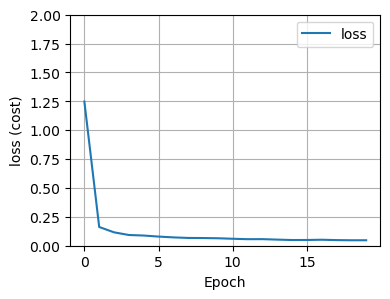

In [15]:
plot_loss_tf(history)

#### B) The Accuracy Vs Epochs during the training 

In [16]:
def plot_accuracy_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    ax.plot(history.history['accuracy'], label='Accuracy')
    ax.set_ylim([0, 2])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend()
    ax.grid(True)
    plt.show()

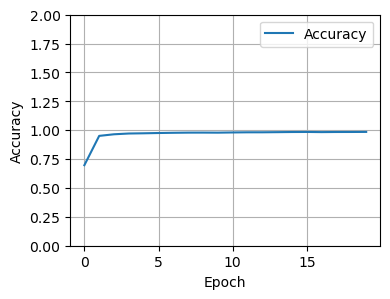

In [17]:
plot_accuracy_tf(history)

#### Important Note: What if you have cross validation data with the training? **Double click **to see what you should do! 

<!--
#To adjust the history for both
# Train the model and obtain the history object
history = model.fit(x_train, y_train, epochs=10, batch_size=1000, validation_data=(x_val, y_val))

# Access training loss values
training_loss = history.history['loss']

# Access validation loss values
validation_loss = history.history['val_loss']

# Access additional metrics if specified, e.g., accuracy
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# To Plot the two figures for both 
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
# ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
# ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
-->



> --> Congratulations!, Once our model has been trained on the data, Now, we can assess its performance on any test data. -->

<a name="evaluate_model"></a>
### 4.3 Evaluate our CNN Model


* Assessing its performance on a separate dataset, typically a validation set or a test set!
* in our example : we use training and test as we don't have cross validation set 
    * The evaluate() function will return a list with two values. 
        * The first will be the loss of the model on the dataset. 
        * The second will be the accuracy of the model on the dataset.
* we will compare the accuracy of our CNN model for the test dataset with the previously built DNN model   

In [18]:
training_loss, training_acc = model.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('The accuracy of our model on Training dataset : %.2f' % (training_acc*100))
print('The loss of our model on Training dataset : %.2f' % (training_loss*100))
print('The accuracy of our model on Test dataset : %.2f' % (test_acc*100))
print('The loss of our model on Test dataset : %.2f' % (test_loss*100))

The accuracy of our model on Training dataset : 99.62
The loss of our model on Training dataset : 1.25
The accuracy of our model on Test dataset : 99.19
The loss of our model on Test dataset : 2.79


#### Our Observation on the model performance

* Flashback :

    * While a simple DNN could achieve a respectable 91% test accuracy on our dataset, a CNNs proved to be the superior choice. 
    * This is because CNNs are specifically designed for image analysis, boasting a built-in feature extractor. Unlike a DNN, which treats images as flat data, a CNN can dissect the image into its individual components, like edges, shapes, and textures. This detailed understanding allows the CNN to pick up on subtle details that a DNN might miss, ultimately leading to more accurate and robust image recognition.

> After successfully training and evaluating your model, you can leverage it to make predictions on new data. 

* Optionally,(if you have cross validation dataset)
    * fine-tune the hyperparameters or architecture based on the validation results to improve the model's overall performance.
    * Once satisfied with the model's performance, deploy it for making predictions on new, unseen data.

<a name="prediction"></a>
## 5- Prediction

<a name="make_prediction"></a>
### 5.1 Make Predictions using our trained model

> here, we are using test data as example to predict, as we don't have cross validation and test datasets 

> Executing the prediction function once over the entire dataset will generate predictions that can be accessed from the output array

In [19]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


> Let's see some cases and compare! you try any image number here as you want

<a name="correct_incorrect"></a>
### 5.2 Visualize correct and incorrect predictions

* Let's look at instances of both correct and incorrect predictions made by our model.

In [20]:
#get the predictions indices for the test data
predicted_indices = np.argmax(predictions, axis=1)
#get the indices to be plotted
correct = np.nonzero(predicted_indices==y_test)[0]
incorrect = np.nonzero(predicted_indices!=y_test)[0]

TODO Later : Make one function to plot the prediction then if it is correct or not correct dynamically get the values **DoubleClick**

<!-- def plot_prediction(case):
    """ 
    This function to plot random 12 case of the prediction in both cases correct and incorrect
    """
    predictions = model.predict(x_test)
    #get the predictions indices for the test data
    predicted_indices = np.argmax(predictions, axis=1)

    fig, axes = plt.subplots(3, 4, figsize=(12, 8))
    fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) 
    for i, ax in enumerate(axes.flat):
        # get random index from the incorrect indexes that already found 
        random_index = case[np.random.randint(len(case))]
        # Display the image after reshape 
        ax.imshow(x_test[random_index].reshape(28, 28), cmap='gray', interpolation='none')
        # Display the label above the image
        ax.set_title("Predicted {}, Real {}".format(predicted_indices[random_index], y_test[random_index]))
        ax.set_axis_off() 
    fig.suptitle("The prediction Vs the real", fontsize=16) 
    plt.show()
# TODO : continue later  -->

#### A) Incorrect cases for our model

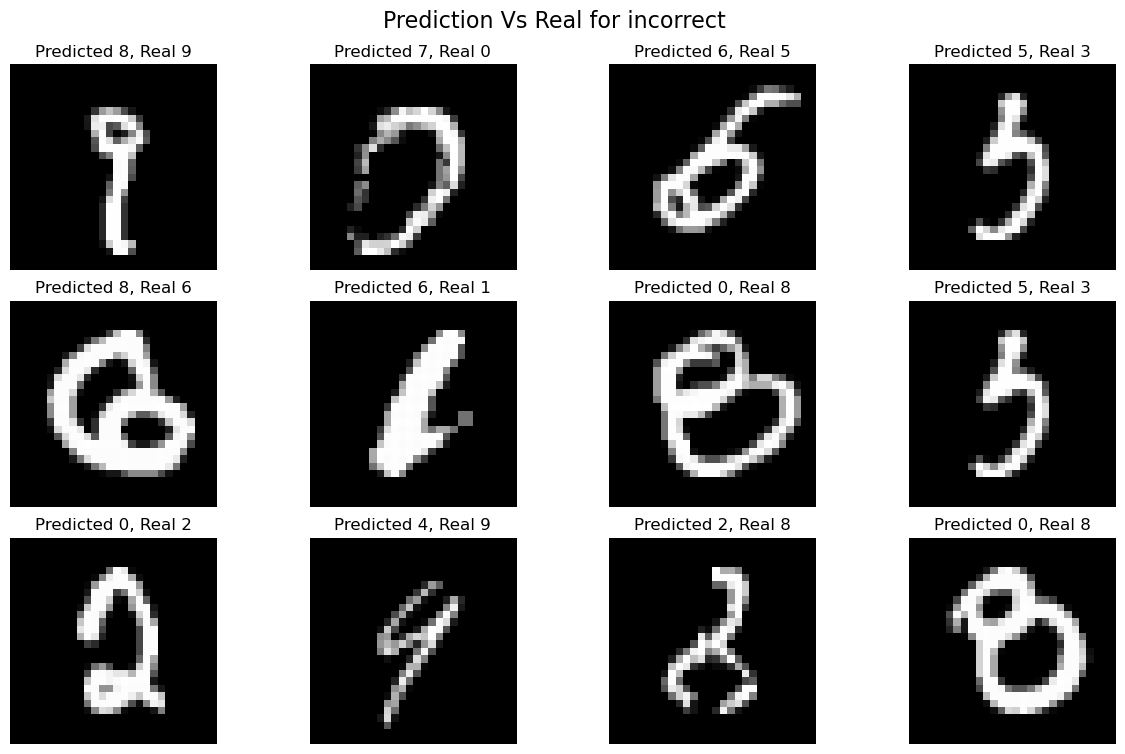

In [21]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) 
for i, ax in enumerate(axes.flat):
    # get random index from the incorrect indexes that already found 
    random_index = incorrect[np.random.randint(len(incorrect))]
    # Display the image after reshape 
    ax.imshow(x_test[random_index].reshape(28, 28), cmap='gray', interpolation='none')
    # Display the label above the image
    ax.set_title("Predicted {}, Real {}".format(predicted_indices[random_index], y_test[random_index]))
    ax.set_axis_off() 
fig.suptitle("Prediction Vs Real for incorrect", fontsize=16) 
plt.show()

#### B) Correct cases for our model

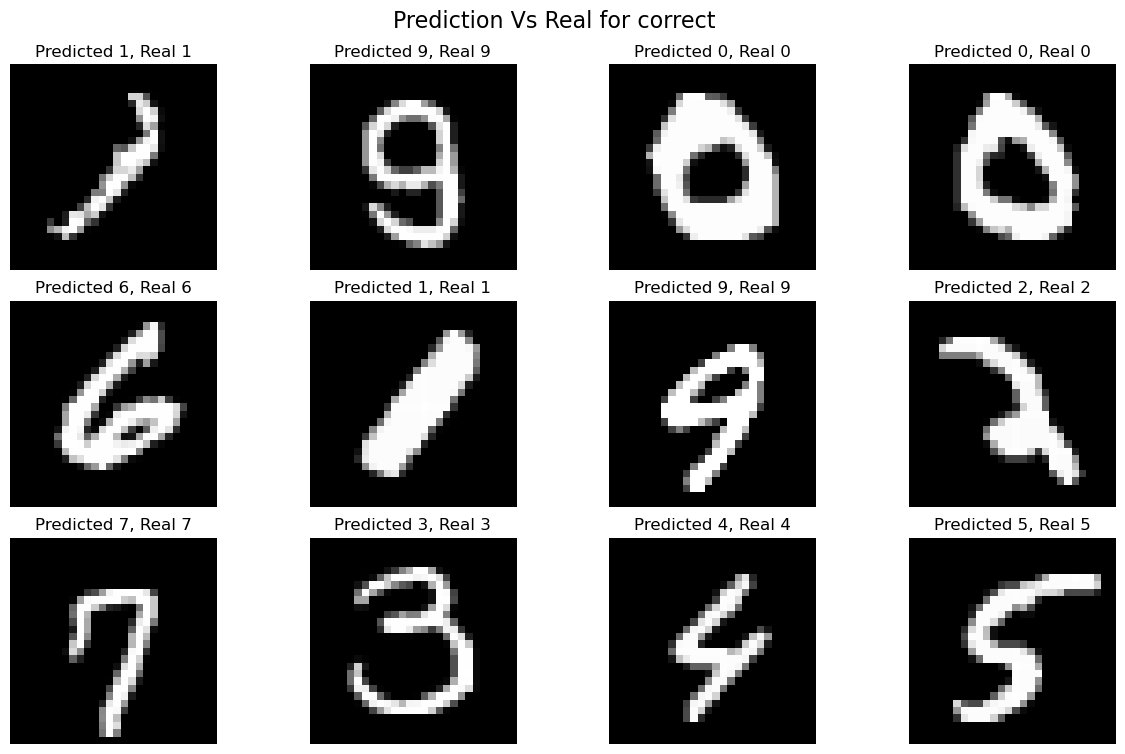

In [22]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) 
for i, ax in enumerate(axes.flat):
    # get random index from the incorrect indexes that already found 
    random_index = correct[np.random.randint(len(correct))]
    # Display the image after reshape 
    ax.imshow(x_test[random_index].reshape(28, 28), cmap='gray', interpolation='none')
     # Display the label above the image
    ax.set_title("Predicted {}, Real {}".format(predicted_indices[random_index], y_test[random_index]))
    ax.set_axis_off() 
fig.suptitle("Prediction Vs Real for correct", fontsize=16) 
plt.show()

<a name="saving"></a>
## 6. Model Saving 

* In keras, we have the option to save either the entire model or the weights of its individual layers after training.
* Commonly we save in HDF5 format **(.h5 file)**. 

<a name="model_saving"></a>
### 6.1 Save the entire model 

In [23]:
model.save('CNN_model_Mnist.h5')

> To load the model in future use 

In [24]:
new_model = keras.models.load_model('CNN_model_Mnist.h5')

<a name="weights_saving"></a>
### 6.2 Save the layers weights

> Note: For max pooling layers, there are typically no learnable parameters, so the weights will be an empty list.

#### A) Access information of the layers **Option 1** 

In [25]:
model.layers[1].weights # 1 is the first convolutional layer 

[<tf.Variable 'batch_normalization/gamma:0' shape=(68,) dtype=float32, numpy=
 array([0.9192927 , 0.9195976 , 0.90406054, 0.9313124 , 0.52385217,
        0.8154638 , 0.6573224 , 0.8351286 , 0.9190288 , 0.9181476 ,
        0.90677804, 0.9122169 , 0.9168813 , 0.44388503, 0.9152441 ,
        0.9197333 , 0.7543455 , 0.91872203, 0.90988255, 0.78609896,
        0.92778975, 0.92484635, 0.90776545, 0.9308869 , 0.49145553,
        0.84365135, 0.51826036, 0.9062222 , 0.56892246, 0.93417686,
        0.92453414, 0.9058621 , 0.9074107 , 0.925804  , 0.92523104,
        0.92262125, 0.66982806, 0.906279  , 0.9105036 , 0.93020815,
        0.9067253 , 0.5755086 , 0.8911713 , 0.9155911 , 0.7335693 ,
        0.83820844, 0.92154354, 0.74596584, 0.9025695 , 0.8416256 ,
        0.9439746 , 0.91773945, 0.9301992 , 0.7488229 , 0.93220633,
        0.8005434 , 0.45340177, 0.9062831 , 0.90841746, 0.8037278 ,
        0.8996308 , 0.9175331 , 0.8787093 , 0.287162  , 0.9088281 ,
        0.7329531 , 0.89147073, 0.9090

#### B) Access information of the layers **Option 2** 

In [26]:
[conv1, batch ,maxpool1, dropout1, conv2, maxpool2, dropout2, flatten,layer1, dropout3, layer2 ] = model.layers

> Example : Access the weights of the convolutional layers

In [27]:
W1,b1 = conv1.get_weights() 
W2,b2 = conv2.get_weights() 
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")

W1 shape = (3, 3, 1, 68), b1 shape = (68,)
W2 shape = (3, 3, 68, 32), b2 shape = (32,)


> Example : Access the weights of the first max pooling layer

In [28]:
maxpool1_layer = model.get_layer("maxpool1")
maxpool1_weights = maxpool1_layer.get_weights()
print("MaxPool1 Weights:", maxpool1_weights)

MaxPool1 Weights: []


#### C) Save layers Weights to use it later

In [29]:
model.save_weights('CNN_model_weights.h5')

<a name="reload_weights"></a>
### 6.3 Reload the weights again in a new model 

#### A) Load the entire model weights one time  

In [30]:
New_loaded_model = tf.keras.models.Sequential()
#start the model with convolutional layer followed by max pooling layer 
New_loaded_model.add(tf.keras.layers.Conv2D(68,kernel_size=(3,3),strides=(1,1),padding="same",activation='relu',input_shape=(28,28,1),name="conv1_loaded"))
New_loaded_model.add(tf.keras.layers.BatchNormalization())
New_loaded_model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2),name="maxpool1_loaded"))
New_loaded_model.add(tf.keras.layers.Dropout(0.2))
# another convolutional layer followed by max pooling layer 
New_loaded_model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding="same",activation='relu',name="conv2_loaded"))
New_loaded_model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2),name="maxpool2_loaded"))
New_loaded_model.add(tf.keras.layers.Dropout(0.2))
# Flatten the output from feature extractor then build the FC layers to get the desired output 
New_loaded_model.add(tf.keras.layers.Flatten())
New_loaded_model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, name="layer1_loaded"))
New_loaded_model.add(tf.keras.layers.Dropout(0.2))
New_loaded_model.add(tf.keras.layers.Dense(10, activation="linear",name="layer2_loaded"))

# Load the weights of the old model
New_loaded_model.load_weights('CNN_model_weights.h5')

> Now, the New_loaded_model has the same weights as the original model, which save a lot of time for future use. 

- Let's Check the weights of the layers 

In [31]:
conv1_loaded = New_loaded_model.get_layer("conv1_loaded")
conv2_loaded = New_loaded_model.get_layer("conv2_loaded")

W1,b1 = conv1_loaded.get_weights() 
W2,b2 = conv2_loaded.get_weights() 

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")

W1 shape = (3, 3, 1, 68), b1 shape = (68,)
W2 shape = (3, 3, 68, 32), b2 shape = (32,)


To do it Just one time **Double Click**
<!-- New_loaded_model.load_weights('CNN_model_weights.h5')
W1,b1=New_loaded_model.get_layer("conv1_loaded").get_weights() 
W2,b2=New_loaded_model.get_layer("conv2_loaded").get_weights() 
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}") -->

#### B) We can set the weights layer by layer

In [32]:
New_loaded_model.get_layer("conv1_loaded").set_weights([W1,b1])

&nbsp;

<a name="other_apps"></a>
## Further TensorFlow (Keras) Applications for CNN 
---------
[Example No 1](CNN_case_studies/Example_No_1_images_6categories.ipynb) : 6 Categories Images Classification.

[Example No 2](CNN_case_studies/Example_No_2_mnist_dataset_acc99.ipynb) : MNIST dataset (Acc 0.997).

[Example No 3](CNN_case_studies/Example_No_3_fashion_related_dataset.ipynb) : fashion-related dataset. 

[Example No 4](CNN_case_studies/Example_No_4_cats_dogs_classification.ipynb) : Cats & Dogs Classification. 

[Example No 5](CNN_case_studies/Example_No_5_Cats_Dogs_classifer.ipynb) : Cats & Dogs classifier and compare to the DNN model. 

&nbsp;
<a name="resources"></a>
## Key Resources Utilized in Crafting This Notebook :
--------------------------
- <a rel="keras_website" href="https://keras.io"> Keras Official Website. </a>
- <a rel="the code used" href="https://www.youtube.com/watch?v=ohyn_MzS_hE&list=PL6-3IRz2XF5VbuU2T0gS_mFhCpKmLxvCP"> Playlist for Keras in Arabic by Hesham Asem. </a>
- <a rel="the code used2" href="https://github.com/HeshamAsem/CNN"> Hesham Asem GitHub for ML tools. </a>

